In [4]:
from glob import glob 

for g in glob('../data/*.pdf'):
    print(g)

../data/2040_seoul_plan.pdf
../data/OneNYC_2050_Strategic_Plan.pdf


In [2]:
from glob import glob

for g in glob('../../chap09/data/*.pdf'):
    print(g)


../../chap09/data/2040_seoul_plan.pdf
../../chap09/data/OneNYC_2050_Strategic_Plan.pdf


In [3]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

def read_pdf_and_split_text(pdf_path, chunk_size=1000, chunk_overlap=100):
    """
    주어진 PDF 파일을 읽고 텍스트를 분할합니다.
    매개변수:
        pdf_path (str): PDF 파일의 경로.
        chunk_size (int, 선택적): 각 텍스트 청크의 크기. 기본값은 1000입니다.
        chunk_overlap (int, 선택적): 청크 간의 중첩 크기. 기본값은 100입니다.
    반환값:
        list: 분할된 텍스트 청크의 리스트.
    """
    print(f"PDF: {pdf_path} -----------------------------")

    pdf_loader = PyPDFLoader(pdf_path)
    data_from_pdf = pdf_loader.load()

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size, chunk_overlap=chunk_overlap
    )

    splits = text_splitter.split_documents(data_from_pdf)
    
    print(f"Number of splits: {len(splits)}\n")
    return splits

In [6]:
from dotenv import load_dotenv
import os
from glob import glob

from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma

# .env 파일 로드 및 API 키 설정
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

# PDF 파일을 로드하고 텍스트를 분할하는 함수
def read_pdf_and_split_text(pdf_path):
    from langchain_community.document_loaders import PyPDFLoader
    from langchain_text_splitters import RecursiveCharacterTextSplitter

    loader = PyPDFLoader(pdf_path)
    docs = loader.load()

    splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=100
    )
    return splitter.split_documents(docs)

# 임베딩 모델 초기화
embedding = OpenAIEmbeddings(
    model='text-embedding-3-large',
    api_key=api_key
)

# 벡터스토어 저장 디렉토리 경로
persist_directory = '../chroma_store'

# 벡터스토어 초기화 또는 새로 생성
if os.path.exists(persist_directory):
    print("Loading existing Chroma store")
    vectorstore = Chroma(
        persist_directory=persist_directory,
        embedding_function=embedding
    )
else:
    print("Creating new Chroma store")
    vectorstore = None
    for g in glob('../chap09/data/*.pdf'):  # PDF 파일 경로 확인 필요
        chunks = read_pdf_and_split_text(g)
        for i in range(0, len(chunks), 100):
            if vectorstore is None:
                vectorstore = Chroma.from_documents(
                    documents=chunks[i:i+100],
                    embedding=embedding,
                    persist_directory=persist_directory
                )
            else:
                vectorstore.add_documents(documents=chunks[i:i+100])

print("Vectorstore setup completed.")


Loading existing Chroma store
Vectorstore setup completed.


In [7]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

chunks = retriever.invoke("서울 온실가스 저감 계획")

for chunk in chunks:
    print(chunk.metadata)
    print(chunk.page_content)

{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09:00', 'page': 63, 'page_label': '64', 'pdfversion': '1.4', 'producer': 'Hancom PDF 1.3.0.542', 'source': '/Users/moonki/Desktop/gpt-agent/gpt_agent/chap09/data/2040_seoul_plan.pdf', 'total_pages': 205}
56제2장 미래상과 목표
6. 미래위기를 준비하는, ‘탄소중립 안전도시 구축’1) 배경전(全) 지구적인 기후변화에 대응하기 위한 대도시 차원의 대응 필요Ÿ서울시 2017년 온실가스 배출량은 46,685천 톤CO2eq로 2005년 배출량에 비해 5.6%(276만 톤CO2eq) 감소하였으며, 서울의 1인당 온실가스 배출량은 4.7CO2eq로 국가의 13.8톤CO2eq에 비해 낮은 수준이다. 또한 2014년 기준 서울의 1인당 온실가스 배출량은 4.5CO2eq로 세계 주요 도시에 비해 낮은 수준을 보인다.7)
[그림 2-26] 세계 주요 도시 1인당 온실가스 배출량   자료: World Bank, 2014Ÿ그럼에도 불구하고, 기후변화 문제는 21세기에 전 지구적으로 가장 위중한 영향을 미칠 것으로 예상되는바, 탄소중립과 기후위기 대응은 국제·국가·도시의 핵심 정책으로 다루어져야 한다.Ÿ파리협정(2015) 이후, 우리나라를 비롯한 미국, 유럽연합 등 세계 136개국이 탄소중립을 선언하였으며, 서울시를 비롯한 뉴욕, 런던 등과 같은 많은 글로벌 도시에서 탄소중립을 시정의 핵심과제로 추진 중이다.Ÿ우리나라는 2020년 ‘한국판 그린뉴딜’을 발표하며 공식적으로 2050 탄소중립을 선언하였으며 서울시 역시 2020년 ‘그린뉴딜 추진을 통한 2050 온실가스 감축 전략’을 발표하고 탄소중립 

In [8]:
from langchain_openai import ChatOpenAI

# 모델 초기화
model = ChatOpenAI(model="gpt-4o-mini")
model.invoke('안녕하세요!')

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 10, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BX1Fc2U0Cj0z7aB09IXKhDUeetJme', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5332dfbd-a14b-4548-85ac-2edfe614eef7-0', usage_metadata={'input_tokens': 10, 'output_tokens': 11, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
# Router 설정
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal # 문자열 리터럴 타입을 지원하는 typing 모듈의 클래스
from pydantic import BaseModel, Field

# Data model
class RouteQuery(BaseModel):
    """사용자 쿼리를 가장 관련성이 높은 데이터 소스로 라우팅합니다."""
    
    datasource: Literal["vectorstore", "casual_talk"] = Field(
        ...,
        description="""
        사용자 질문에 따라 casual_talk 또는 vectorstore로 라우팅합니다.
        - casual_talk: 일상 대화를 위한 데이터 소스. 사용자가 일상적인 질문을 할 때 사용합니다.
        - vectorstore: 사용자 질문에 답하기 위해 RAG로 vectorstore 검색이 필요한 경우 사용합니다.
        """,
    )

In [10]:
# 특정 모델을 structured output (구조화된 출력)과 함께 사용하기 위해 설정
structured_llm_router = model.with_structured_output(RouteQuery)

router_system = """
당신은 사용자의 질문을 vectorstore 또는 casual_talk으로 라우팅하는 전문가입니다.
- vectorstore에는 서울, 뉴욕의 발전계획과 관련된 문서가 포함되어 있습니다. 이 주제에 대한 질문에는 vectorstore를 사용하십시오.
- 사용자의 질문이 일상 대화에 관련된 경우 casual_talk을 사용하십시오.
"""

# 시스템 메시지와 사용자의 질문을 포함하는 프롬프트 템플릿 생성
route_prompt = ChatPromptTemplate.from_messages([
    ("system", router_system),
    ("human", "{question}"),
])

# 라우터 프롬프트와 구조화된 출력 모델을 결합한 객체
question_router = route_prompt | structured_llm_router

In [11]:
print(
    question_router.invoke({
        "question": "서울 온실가스 저감 계획은 무엇인가요?"
    })
)

print(question_router.invoke({"question": "잘 지냈어?"}))

datasource='vectorstore'
datasource='casual_talk'


In [12]:
from langchain_core.prompts import PromptTemplate

class GradeDocuments(BaseModel):
    """검색된 문서가 질문과 관련성 있는지 yes 또는 no로 평가합니다."""

    binary_score: Literal["yes", "no"] = Field(
        description="문서가 질문과 관련이 있는지 여부를 'yes' 또는 'no'로 평가합니다."
    )

structured_llm_grader = model.with_structured_output(GradeDocuments)

In [13]:
grader_prompt = PromptTemplate.from_template("""
당신은 검색된 문서가 사용자 질문과 관련이 있는지 평가하는 평가자입니다. \n 
문서에 사용자 질문과 관련된 키워드 또는 의미가 포함되어 있으면, 해당 문서를 관련성이 있다고 평가하십시오. \n
엄격한 테스트가 필요하지 않습니다. 목표는 잘못된 검색 결과를 걸러내는 것입니다. \n
문서가 질문과 관련이 있는지 여부를 나타내기 위해 'yes' 또는 'no'로 이진 점수를 부여하십시오.
                                             
Retrieved document: \n {document} \n\n 
User question: {question}
""")

retrieval_grader = grader_prompt | structured_llm_grader
question = "서울시 자율주행 관련 계획"
documents = retriever.invoke(question)

for doc in documents:
    print(doc)

page_content='36제2장 미래상과 목표
6) 미래교통수단의 등장과 첨단 인프라 요구 증대자율주행, UAM 등 미래 교통에 공간적 대응방안 마련 필요Ÿ자율주행차량, 전동킥보드 등 교통 기술의 발전에 따라 새로운 교통환경이 조성되고 있음에도 불구하고, 이에 대한 정착 가이드라인이 없어, 위험한 교통 사고가 유발되고 있다.-최근 3년간 서울시에서 발생한 전동킥보드 관련 사고 대다수는 전동 킥보드와 차량 간 충돌 사고Ÿ안전하고 효율적인 기존-신규 교통수단의 조화를 도모하고, 이와 함께 발생할 도시공간구조 변화에 대비하기 위해 통합적인 교통수단 정착 가이드라인이 필요하다.7) 시가지 공간의 포화, 개발가용지의 부족새로운 도시공간에 대한 수요 대응과 성장동력 확보 한계Ÿ서울의 녹지지역을 제외한 대부분의 개발가용지는 고갈된 상태이며, 남은 공간은 주택공급을 위주로 개발하고 있다.-서울시에서 개발제한구역 25%를 제외하면 65%에 해당하는 시가화면적 366㎢ 중 미개발지는 거의 없는 상태Ÿ외연적 팽창이 아닌, 선택과 집중을 통한 콤팩트 시티로의 공간구조 재편을 지향하고 복합 개발을 통해 약해진 도시경쟁력 강화가 필요한 시점이다.8) 늙어가는 서울, 도시 정비의 정체에 따른 환경 악화정비사업 추진동력 저하, 쾌적한 도시환경에 대한 요구 증대Ÿ2038년 서울시 기반시설 노후화 비율은 2018년 대비 2.7배 급증, 1960~70년대 집중 조성된 기반시설의 노후화에 따른 시설 안전성 확보가 필요하다.-2040년, 서울 전체 주택 중 노후 물량 50%로 추정Ÿ때문에, 쾌적한 도시환경 구축을 위해서는 노후 기반시설로 인한 안전성 검토와 개선비용 증가에 따른 선제적인 대응이 필요하다.
[그림 2-19] 서울시 전동킥보드 사고 추이자료: 서울시 소방재난본부
제1절 서울의 변화진단379) 경직된 서울, 도시계획 규제 완화에 대한 요구 증대지역특성과 미래변화를 고려한 유연한 도시계획 요구Ÿ과도한 도시계획 규제로 인해, 미래 융복합 시대에' metadata={'author': 'S

In [14]:
filtered_docs = []

for i, doc in enumerate(documents):
    print(f"Document {i + 1}:")
    is_relevant = retrieval_grader.invoke({"question": question, "document": doc.page_content})
    print(is_relevant)
    print(doc.page_content[:200])
    print("=================================\n\n")

    if is_relevant.binary_score == "yes":
        filtered_docs.append(doc)

print(f"Filtered documents: {len(filtered_docs)}")

Document 1:
binary_score='yes'
36제2장 미래상과 목표
6) 미래교통수단의 등장과 첨단 인프라 요구 증대자율주행, UAM 등 미래 교통에 공간적 대응방안 마련 필요Ÿ자율주행차량, 전동킥보드 등 교통 기술의 발전에 따라 새로운 교통환경이 조성되고 있음에도 불구하고, 이에 대한 정착 가이드라인이 없어, 위험한 교통 사고가 유발되고 있다.-최근 3년간 서울시에서 발생한 전동킥보드 관련 사고 


Document 2:
binary_score='yes'
54제2장 미래상과 목표
5. 기술발전에 선제적 대응, ‘미래교통 인프라 구축’1) 배경미래교통수단 도입에 따른 도시 활동 변화 및 공간구조 재편 대비Ÿ빠르게 진화하는 미래 신 교통수단은 도시공간에 새로운 변화를 일으킬 것이며, 도시 내 이동패턴의 변화를 가져올 것으로 예측된다. 이러한 점을 고려하여 도시 내 다양한 통행행태가 공존하는 포용적인 교통체계 구


Document 3:
binary_score='yes'
제1절 서울의 변화진단353) 반복되는 팬데믹에 도시공간적 대응상수화되는 팬데믹, 회복탄력적 도시에 대한 관심 고조Ÿ2019년 발생한 코로나19에 의한 팬데믹은 서울시민의 일상생활을 마비시켰고 강제적인 거리두기 정책으로 경제위기가 심각해졌다.Ÿ전염병에 의한 팬데믹은 지속적으로 발생할 것으로 예측되고 있으며 이에 선제적인 예방 체계와 즉각적 대응을 위한 기반


Document 4:
binary_score='yes'
90제3장 부문별 전략계획
5-1 미래교통수단과 융합을 위한 선제적 교통환경 구축5-1-1 신 교통수단·기술발전 등 미래 환경 변화에 대비한 인프라 구축·정비ŸUAM·전기차·자율주행차 등 미래교통수단의 상용


Document 5:
binary_score='yes'
따른 UAM, 자율주행, PM 등 미래교통수단의 효율적 정착을 위한 3차원 도시인프라를 확충한다.-자율주행 자동차 기반 구축, 서울형 도심항공 교통인프라 확보, 모빌리티 허브 및 3차원 물류체계 구축 등 도시인프

In [15]:
### Generate
# PromptTemplate을 사용하여 RAG를 위한 프롬프트를 생성합니다.

rag_generate_system = """
너는 사용자의 질문에 대해 주어진 context에 기반하여 답변하는 도시 계획 전문가이다. 
주어진 context는 vectorstore에서 검색된 결과이다. 
주어진 context를 기반으로 사용자의 question에 대해 답변하라.

=================================
question: {question}
context: {context}
"""

# PromptTemplate을 생성하여 question과 context를 포맷팅
rag_prompt = PromptTemplate(
    input_variables=["question", "context"],
    template=rag_generate_system
)

# rag chain
rag_chain = rag_prompt | model 

# 사용자 질문과 검색된 문서를 입력으로 사용하여 RAG를 실행
question = "서울시 자율주행 관련 계획"

rag_chain.invoke({"question": question, "context": filtered_docs})

AIMessage(content='서울시는 자율주행 차량과 같은 미래 교통수단의 효율적 정착을 위한 다양한 계획을 추진하고 있습니다. 주요 내용은 다음과 같습니다:\n\n1. **자율주행 인프라 구축**: 서울시는 2030년까지 간선도로급 이상의 도로에서 자율주행 차량이 운영될 수 있는 도로 인프라를 조성할 계획입니다. 2040년까지는 서울 전역에 자율주행 차량 운행 환경을 완비하여 수송 분담률을 10%까지 높이는 목표를 세우고 있습니다.\n\n2. **도시 항공 교통(UAM) 인프라**: 도심과 김포공항을 연결하는 시범 노선을 운영하고, 장기적으로 한강 및 주요 수변 지역을 중심으로 광역 노선을 확충할 예정입니다. UAM의 상용화를 위한 인센티브와 도시계획적 지원 방안도 동시에 검토하고 있습니다.\n\n3. **모빌리티 허브 구축**: 서울 전역에 미래 교통과 기존 교통을 연결하는 모빌리티 허브를 도입하여, 다양한 기능이 복합적으로 제공되는 지역 거점을 조성할 계획입니다. 이는 교통뿐 아니라 공공서비스, 물류, 상업 기능 등을 아우르는 공간으로 설계됩니다.\n\n4. **신교통수단과 기존 대중교통의 통합**: 자율주행, UAM 등 다양한 새로운 교통수단과 기존 대중교통 간의 원활한 환승 체계를 구축하기 위해, 주요 거점에 대한 유형별 환승 체계 계획도 진행됩니다.\n\n이러한 계획들은 서울시가 빠르게 변화하는 교통 환경에 적응하고, 시민들에게 보다 안전하고 효율적인 교통 서비스를 제공하기 위한 목적을 가지고 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 396, 'prompt_tokens': 3038, 'total_tokens': 3434, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 

In [16]:
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
    question: str   # 사용자 질문
    generation: str # LLM 생성 결과
    documents: List[str] # 검색된 문서

In [17]:
def route_question(state): 
    """
    사용자 질문을 vectorstore 또는 casual_talk로 라우팅합니다.
    
    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 라우팅된 데이터 소스와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------ROUTE------')
    question = state['question']
    route = question_router.invoke({"question": question})

    
    print(f"---Routing to {route.datasource}---")
    return route.datasource   

In [18]:
def retrieve(state): 
    """
    vectorstore에서 질문에 대한 문서를 검색합니다.
    
    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 검색된 문서와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------RETRIEVE------')
    question = state['question']

    # Retrieve documents
    documents = retriever.invoke(question)
    return {"documents": documents, "question": question}


In [19]:
def grade_documents(state):
    """
    검색된 문서를 평가하여 질문과 관련성이 있는지 확인합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 관련성이 있는 문서와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------GRADE------')
    question = state['question']
    documents = state['documents']
    filtered_docs = []

    for i, doc in enumerate(documents):
        is_relevant = retrieval_grader.invoke({"question": question, "document": doc.page_content})
        if is_relevant.binary_score == "yes":
            filtered_docs.append(doc)
    return {"documents": filtered_docs, "question": question}  

In [20]:
def generate(state):
    """
    LLM을 사용하여 문서와 사용자 질문에 대한 답변을 생성합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): LLM 생성 결과와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------GENERATE------')
    question = state['question']
    documents = state['documents']
    generation = rag_chain.invoke({"question": question, "context": documents})
    return {
        "documents": documents,
        "question": question,
        "generation": generation
    }

In [21]:
def casual_talk(state):
    """
    일상 대화를 위한 답변을 생성합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 일상 대화 결과와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------CASUAL TALK------')
    question = state['question']
    generation = model.invoke(question)
    return {
        "question": question,
        "generation": generation
    }

In [22]:
from langgraph.graph import START, StateGraph, END

workflow = StateGraph(GraphState)

In [23]:
# 노드를 정의 
workflow.add_node("retrieve", retrieve)
workflow.add_node("grade_documents", grade_documents)
workflow.add_node("generate", generate)
workflow.add_node("casual_talk", casual_talk)

In [24]:
# graph를 정의
workflow.add_conditional_edges(
    START, 
    route_question,
    {
        "vectorstore": "retrieve",
        "casual_talk": "casual_talk"
    }
)
workflow.add_edge("casual_talk", END)
workflow.add_edge("retrieve", "grade_documents")
workflow.add_edge("grade_documents", "generate")
workflow.add_edge("generate", END)

app = workflow.compile() # workflow를 컴파일

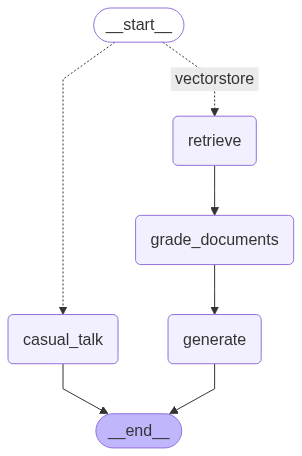

In [25]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    #  실패 시 통과
    pass


In [26]:
inputs = {
    "question": "서울시 자율주행 계획"
}

app.invoke(inputs) # workflow를 실행합니다.


------ROUTE------
---Routing to vectorstore---
------RETRIEVE------
------GRADE------
------GENERATE------


{'question': '서울시 자율주행 계획',
 'generation': AIMessage(content='서울시는 미래 교통수단의 도입 및 이에 대한 인프라 구축을 통해 자율주행차량과 같은 새로운 교통 수단을 적극적으로 수용하고 있습니다. 서울시의 자율주행 계획의 주요 목표는 2040년까지 도시 전역에서 자율주행 차량이 운행될 수 있는 환경을 구축하는 것입니다. 이 계획은 다음과 같은 내용을 포함합니다:\n\n1. **자율주행 운영 체계 구축**: 2030년까지는 간선도로급 이상 도로에서 자율주행차량이 운영될 수 있는 인프라를 조성하고, 2040년까지 서울 전역에서 자율주행차량이 운행될 수 있도록 할 계획입니다.\n\n2. **수송 분담률 목표 설정**: 자율주행차의 수송 분담률을 10%로 설정하고, 이를 달성하기 위한 다양한 노력과 인프라 개발이 필요합니다.\n\n3. **모빌리티 허브 구축**: 서울 전역에 걸쳐 다양한 교통 수단과 서비스를 통합하여 연결할 수 있는 모빌리티 허브를 도입하고, 이를 통해 공공 서비스, 물류 및 상업적 기능이 함께 제공되도록 설계합니다.\n\n4. **도심 항공교통(UAM) 기반 마련**: 교통수단 확장을 위해 도심과 공항을 연결하는 시범노선 운영 및 장기적으로 주요 수변 공간을 중심으로 한 광역노선 확보를 목표로 하고 있습니다.\n\n서울시는 이러한 계획을 통해 자율주행차와 같은 미래교통수단의 정착을 위한 통합적이고 포용적인 교통 체계를 구축하고, 도시 내 이동 패턴의 변화를 효과적으로 관리하고자 합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 383, 'prompt_tokens': 2657, 'total_tokens': 3040, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoni

In [27]:
inputs = {
    "question": "잘 지내고 있어? 내 이름 기억 나?"
}

app.invoke(inputs) # workflow를 실행합니다.

------ROUTE------
---Routing to casual_talk---
------CASUAL TALK------


{'question': '잘 지내고 있어? 내 이름 기억 나?',
 'generation': AIMessage(content='안녕하세요! 저는 내용을 기억하지 못하지만, 당신과의 대화를 돕기 위해 여기 있습니다. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 18, 'total_tokens': 48, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BX1N8tsB3453FoLkT4HXCfTbLaG3E', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d1d8e879-2e71-415b-b08a-db7ecc8305e3-0', usage_metadata={'input_tokens': 18, 'output_tokens': 30, 'total_tokens': 48, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}

In [28]:
inputs = {
    "question": "서울시의 부동산 관련 계획은 무엇이 있나요?"
}

for msg, meta in app.stream(inputs, stream_mode='messages'):
    print(msg.content, end='')

------ROUTE------
{"datasource":"vectorstore"}---Routing to vectorstore---
------RETRIEVE------
------GRADE------
{"binary_score":"yes"}{"binary_score":"yes"}{"binary_score":"yes"}{"binary_score":"yes"}{"binary_score":"yes"}------GENERATE------
서울시의 부동산 관련 계획은 주로 2040 수도권 광역도시계획과 서울시 지역균형발전계획, 그리고 주택·정비 부문에서 구체화되고 있습니다.

1. **2040 수도권 광역도시계획**: 서울시, 인천시, 경기도가 함께 수립 중인 이 계획은 "살기 좋고 국제경쟁력을 갖춘 상생·통합의 수도권"을 비전으로 하고 있습니다. 이 계획은 토지이용, 광역교통, 녹지환경 등 다양한 부문별 기본 방향과 추진과제를 설정하고 있습니다.

2. **서울시 지역균형발전계획**: 이 계획은 서울시 내 지역 간 격차 해소를 위한 5대 전략을 설정하고, 각 지역의 특성에 맞춘 산업 및 일자리 기반 조성을 목표로 하고 있습니다. 주거환경 개선, 평등한 교육 기회 제공 등도 포함되어 있습니다.

3. **주택 공급 확대**: 서울시는 양질의 주택 공급을 위한 다양한 도시계획적 수단을 도입하고 있습니다. 저이용·유휴지를 활용하여 주택 공급을 활성화하고, 공공임대주택 및 민간 참여를 통한 주택 공급을 늘리는 방안을 추진하고 있습니다.

4. **스마트 주거 환경 조성**: 기술 발전에 따른 디지털 전환을 감안하여, 주거 환경의 미래를 대비하는 스마트 주택 개발을 추진하고 있습니다.

이와 같은 계획들은 서울시의 부동산 시장을 더욱 안정적으로 만들고, 지역균형 발전을 도모하기 위한 방향성을 가지고 있습니다.